# Package Import

In [2]:
# !pip install textacy --quiet
# !pip install bz2file --quiet
# !pip install markovify --quiet

In [1]:
import re
import os
import bz2
import sys
import time
import nltk
import spacy
# import gensim
import random
import pickle
import requests
import markovify
import numpy as np
import pandas as pd
from os import path
import seaborn as sns
from PIL import Image
from nltk import pos_tag
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
# from wordcloud import WordCloud, STOPWORDS
# from gensim.summarization import summarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [2]:
# !python -m spacy download en --quiet

In [3]:
# nltk.download('averaged_perceptron_tagger')

# Helper Functions

In [ ]:
def word_cloud(doc, colormap='tab10', mode='RGBA', from_='', to=''):
  d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
  mask = np.array(Image.open(path.join(d, from_)))

  cloud = WordCloud(background_color=None, max_words=2000, mask=mask, colormap=colormap,
               stopwords=STOPWORDS, contour_width=1, contour_color='white').generate(doc)
  plt.figure(figsize=(12,10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.savefig(to)
  plt.show()

In [ ]:
class POSifiedText(markovify.Text):
  def word_split(self, sentence):
    words = re.split(self.word_split_pattern, sentence)
    words = [ '::'.join(tag) for tag in pos_tag(words) ]
    return words

  def word_join(self, words):
    sentence = ' '.join(word.split('::')[0] for word in words)
    return sentence

In [ ]:
def text_stats(docsents, doctokens, docnostop):
  sents = docsents
  tokens = doctokens
  words = docnostop
  num_sents = len(sents)
  num_tokens = len(tokens)
  num_words = len(words)
  vocab = len(set(tokens))
  characters = sum([len(word) for word in tokens])

  #filter = ['PERSON','NORP','FAC','ORG','GPE','LOC','PRODUCT','EVENT','WORK_OF_ART','LAW','LANGUAGE']
  #entities = [entity.text for entity in spacy_doc.ents if entity.label_ in filter]
  #num_entities = len(set(entities))

  
  words_per_sent = num_tokens / num_sents
  char_per_word = characters / num_tokens
  lex_div = vocab / num_tokens

  stats = [num_sents, num_tokens, num_words, vocab, words_per_sent, char_per_word, lex_div]
  return stats

In [5]:
nlp = spacy.load('en_core_web_sm')

# Web-Scraper

In [ ]:
# Webscraper for .txt files on the web. 4000+ stories will be scraped if this is ran again... 

# start = time.time()
# alpha = ['0','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
# for _ in alpha:
#   PATH = '/content/drive/MyDrive/python_for_data_scientists/Storytime/'+_+'/'
#   url = 'http://textfiles.com/sex/EROTICA/'+_+'/'
#   res = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
#   con = res.text
#   TAGS = ['a']
#   soupy = BeautifulSoup(con, 'lxml')
#   text_ = soupy.find_all(TAGS)
#   text = []
#   text.append(text_)
#   fles = [inner for outer in text for inner in outer]
#   poof_ = [que.text for que in fles]
#   for i in poof_:
#     url1 = 'http://textfiles.com/sex/EROTICA/'+_+'/'+i
#     res1 = requests.get(url1, headers={"User-Agent":"Mozilla/5.0"})
#     con1 = res1.text
#     TAGS1 = ['body']
#     soupy1 = BeautifulSoup(con1, 'lxml')
#     text_1 = soupy1.find_all(TAGS1)
#     fles1 = [inner for outer in text_1 for inner in outer]
#     poof1 = [que.text for que in fles1]
#     text1 = ' '.join(poof1)

#     file = open(PATH + f'{i}', 'wb')
#     file.write(text1.encode())
#     file.close()

# print(f'runtime:{time.time()-start} seconds')

In [ ]:
# Scraper broke down midway though 'P' wrote singular script to finish out P.

# PATH = '/content/drive/MyDrive/python_for_data_scientists/Storytime/P/'
# url = 'http://textfiles.com/sex/EROTICA/P/'

  
# res = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
# con = res.text
# TAGS = ['a']
# soupy = BeautifulSoup(con, 'lxml')
# text_ = soupy.find_all(TAGS)
# text = []
# text.append(text_)
# fles = [inner for outer in text for inner in outer]
# poof_ = [que.text for que in fles]

# start = time.time()
# for i in poof_[113:]:
#   url1 = 'http://textfiles.com/sex/EROTICA/P/'+i
#   res1 = requests.get(url1, headers={"User-Agent":"Mozilla/5.0"})
#   con1 = res1.text
#   TAGS1 = ['body']
#   soupy1 = BeautifulSoup(con1, 'lxml')
#   text_1 = soupy1.find_all(TAGS1)
#   fles1 = [inner for outer in text_1 for inner in outer]
#   poof1 = [que.text for que in fles1]
#   text1 = ' '.join(poof1)

#   file = open(PATH + f' {i}', 'wb')
#   file.write(text1.encode())
#   file.close()

# print(f'runtime:{time.time()-start} seconds')


# Data Import

In [ ]:
DOC_PATTERN = r'.*\.txt'
_ALL_ = PlaintextCorpusReader('/content/drive/MyDrive/Cap4/Stories', DOC_PATTERN)

In [ ]:
 len(_ALL_.fileids())

20

In [ ]:
# Getting docs from corpus reader
DOCS = [_ALL_.raw(fileid) for fileid in _ALL_.fileids()]

In [ ]:
# Cleaning docs of special characters
clean = [doc.split() for doc in DOCS]
cleaner = [' '.join(doc) for doc in clean]
cleanest = [re.sub(r'([`øä~@©#$\%ÿ^[\\&*()_+=}{/\]|\":;<,/>])', ' ', doc) for doc in cleaner]
mrclean = [doc.replace("\'","") for doc in cleanest]
DOCS = [doc.replace('\"',"") for doc in mrclean]
# DOCS

# Doc Stats

In [ ]:
# Prepping data for text_stats function.

# DOCSstat = [nlp(doc) for doc in DOCS]
doc_stops = []
for doc in DOCSstat:
  for sent in doc.sents:
    for word in sent:
      if not word.is_stop | word.is_punct | word.is_digit:
        doc_stops.append(word.lower_)

doc_tokens = []
for doc in DOCSstat:
  for sent in doc.sents:
    for word in sent:
      if word.is_alpha:
        doc_tokens.append(word.lower_)

doc_sents = []
for doc in DOCSstat:
  for sent in doc.sents:
    doc_sents.append(sent.text)

In [ ]:
# Gathering stats on the fan-fic mood stories. 
stats = text_stats(doc_sents, doc_tokens, doc_stops)
df = pd.DataFrame(stats).T
df.columns = ['Sentences','Tokens','Words','Vocab','Avg. Sentence','Avg. Word','Lexical Diversity']
# df.to_csv('/content/drive/MyDrive/Cap4/Stats/doc_stats.csv')
df

,Sentences,Tokens,Words,Vocab,Avg. Sentence,Avg. Word,Lexical Diversity
0,30291.0,276445.0,149603.0,13217.0,9.126308,4.270068,0.047811


# Wordclouds

In [ ]:
# Feeding all the docs into one string for word cloud
one_long = ''
for doc in DOCS:
  one_long += doc.lower()

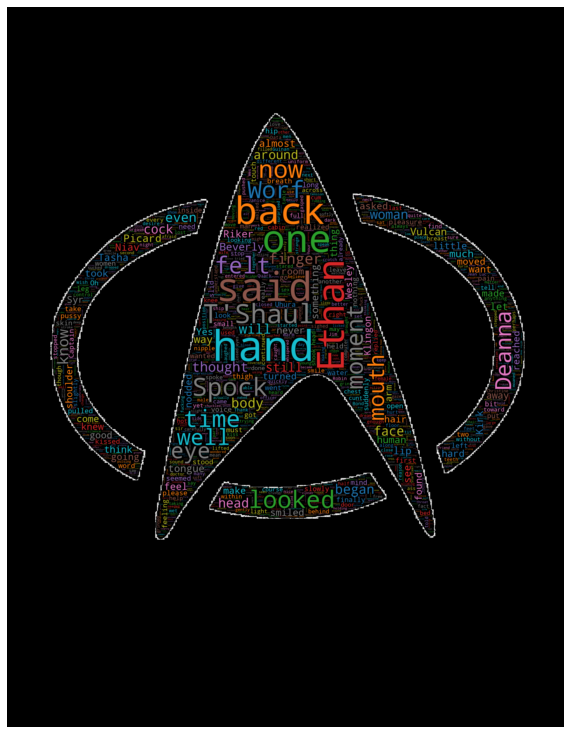

In [ ]:
# Individually selecting file by raw .txt name for word cloud
text = _ALL_.raw('trek.txt')
word_cloud(text, from_='/content/drive/MyDrive/Cap4/Images/trek.jpg', to='')

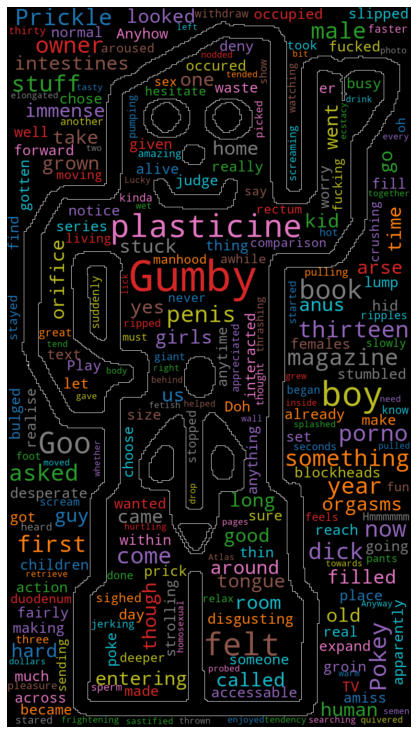

In [ ]:
# Creating word cloud for Gumby
text = _ALL_.raw('gumby.txt')
word_cloud(text, from_='/content/drive/MyDrive/Cap4/Images/freaky_gumby.png', to='')

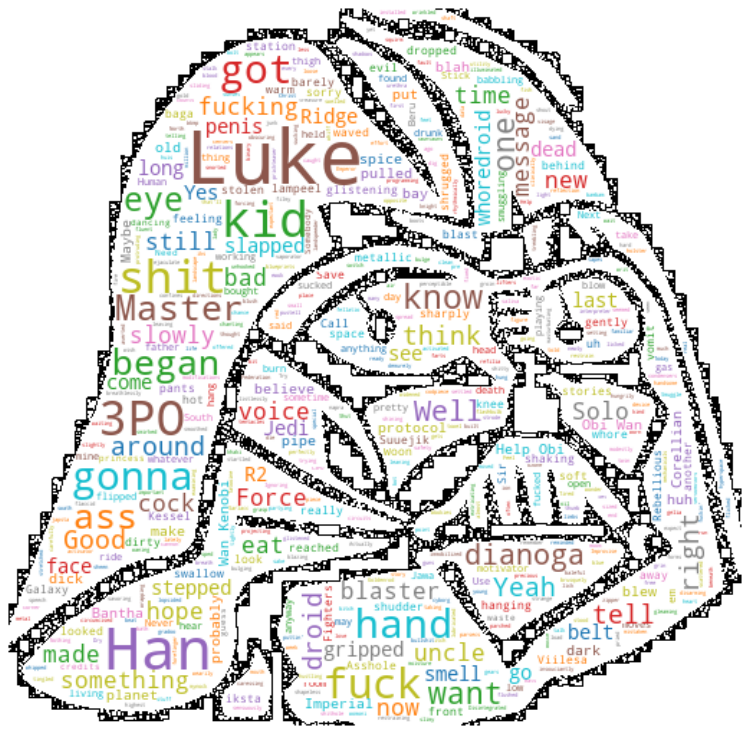

In [ ]:
# Creating word cloud for Star Wars
text = _ALL_.raw('starwhor.txt')
word_cloud(text, from_='/content/drive/MyDrive/Cap4/Images/starwars.jpg', to='')

# Markov 'Scenario' Chains

In [ ]:
# Enumerate through fieldids() and saving the 'Scenario' chains to file.
# for i, txt in enumerate(_ALL_.fileids()):
#   with open("/content/drive/MyDrive/Cap4/Stories/"+txt) as f:
#     text_file = open('/content/drive/MyDrive/Cap4/Mood_Sents/'+txt, "w")
#     model = POSifiedText(f, retain_original=False, state_size=5)
#     for _ in range(10):
#         # print(model.make_sentence())
#       n = text_file.write(model.make_short_sentence(250))
#     text_file.close()
#     print(i, ': Completed')

In [ ]:
# Generaring 'Scenario' sents from Simspons
with open("/content/drive/MyDrive/Cap4/Stories/bart.txt") as f:
  model = POSifiedText(f, retain_original=False)
  for i in range(10):
    print(model.make_short_sentence(250))

the erotic thought of wetting her panties, loving the feel of her juices.
spontaneous thought occurred to him `I wonder if she'd let me wear one of
his shirt.
Lisa felt her brother's tongue continuing to dart into her
She fell back onto her bed, completely naked.
suck him in earnest, his hips began to rub his soapy skin, enjoying his coat of suds.
Lisa climbed into them, and they leaned
For a
inflicted orgasm passing through him intermittently, soaking in the sensation as they responded in rapt attention.
hips, held to him by his sister's mouth.


In [ ]:
# Generaring 'Scenario' sents from one of the Star Treks
with open("/content/drive/MyDrive/Cap4/Stories/ohcaptain.txt") as f:
  model = POSifiedText(f, retain_original=False, state_size=5)
  for i in range(10):
    print(model.make_short_sentence(250))

Sisko flinched from his angry wife's words, shocked at her fury.
Riker roared, leaning very close to her.
Julian realized that it was a cold gel-like substance held in
And, with no link to me, with no physical or mental
She touched his face lightly, placing her other hand atop his head, as she
Quark froze the program for a few seconds, luxuriating in the sight
studied him closely, saying nothing.
His fingers found her and lunged inside.
Picard began walking toward the turbo lift, Beverly
interrupted while you're talking about this with me, especially your


In [ ]:
# Generating 'Scenario' sents from Flintstones
with open("/content/drive/MyDrive/Cap4/Stories/wilma.txt") as f:
  model = POSifiedText(f, retain_original=False, state_size=5)
  for i in range(10):
    print(model.make_short_sentence(250))

It was the first orgasm she'd had in months.
Fred noted as he finished
Wilma's legs and kissed her new lover as hard as she
out the Rubbles front door and entered her house from the
kissing so she was surprised how nice Betty's tongue
the ceiling.
It sometimes seems like
Between her legs she could feel Betty's more
cum covered saber tooth.
Wilma said, finally breaking


# Freq Dist

In [ ]:
# Prepping all texts from all documents for frequency plotting

clean = [doc.split() for doc in DOCS]
cleaner = [' '.join(doc) for doc in clean]
cleanest = [re.sub(r'([`øä~@©#$\%ÿ^[\\&*()_+=}{/\]|\":;<,/>])', ' ', doc) for doc in cleaner]
mrclean = [doc.replace("\'","") for doc in cleanest]
DOCS = [doc.replace('\"',"") for doc in mrclean]

DOCS = [nlp(doc) for doc in DOCS]

no_stops = []
for doc in DOCS:
  for sent in doc.sents:
    for word in sent:
      if not word.is_stop | word.is_punct:
        no_stops.append(word.lower_)

In [ ]:
# Preping text for frequency distribution of each document
text = _ALL_.raw('x-men.txt')
text = text.split()
text = ' '.join(text)
text = re.sub(r'([\-_@ä#$%:^&ÿ;[\]*`ª(),1234567890])', ' ', text)
text = text.replace("\'","")
text = text.replace('\"','')
text = text.replace('  ',' ')
text = nlp(text)

no_stop = []
for sent in text.sents:
  for token in sent:
    if not token.is_stop | token.is_punct | token.is_digit:
      no_stop.append(token.lower_)

In [ ]:
# Creating dataframe to plot the frequency of tokens
fdist = FreqDist(no_stops)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Word','Count']
ordered = fdist_df.sort_values('Count', ascending=False)
filtered = ordered[5:30]
# filtered

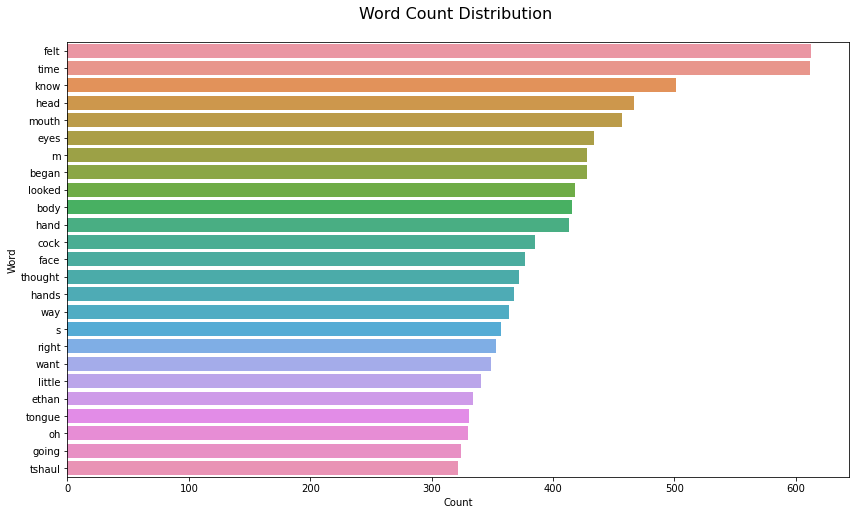

In [ ]:
# Plotting the frequency of the tokens 
plt.figure(figsize=(14,8))
sns.barplot(data=filtered.head(25), x='Count', y='Word')
plt.title('Word Count Distribution \n', fontsize=16)
# plt.savefig('/content/drive/MyDrive/Cap4/Dists/allstoriesfrq.png', transparent=True)

# Summaries

In [ ]:
# Enumerate through fieldids() and saving the gensim summarization to file.
# for i, txt in enumerate(_ALL_.fileids()):
#   text_file = open('/content/drive/MyDrive/Cap4/Summaries/'+txt, "w")
#   n = text_file.write(summarize(DOCS_[i], ratio=.1, word_count=100))
#   text_file.close()
#   print(txt, ': Completd')

In [ ]:
# Saving one gensim summarization to file.
# text_file = open('/content/drive/MyDrive/Cap4/Summaries/enterprise2.txt', "w")
# n = text_file.write(summarize(doc[214000:], ratio=.1, word_count=100))
# text_file.close()

In [ ]:
# Power Ranger Summary
print(summarize(DOCS[9], ratio=.1, word_count=100))

the Pink Power Ranger, was enjoying a peaceful 
She had a date tonight with Tommy, the White Ranger, 
better, Pink Ranger!" purred Mistress D.
"All right, you asked for it!" Tommy said as he 
Kimberly's legs sprang to life and she felt her body 
"Let's check Tommy's room for clues." said the Red 
do the same, so don't even try."  Kimberly and Tommy 
Back in Tommy's apartment the Power Rangers were 
Tommy, in a White Ranger-like suit without the 
Tommy and Kimberly felt a familiar vibrating 
Tommy and Kimberly looked at 
"Tommy!" gasped The Pink Mistress, as they heard 


In [ ]:
# Hillary Clinton Summary
print(summarize(DOCS[7], ratio=.1, word_count=100))

Hillary Clinton would look extremely sexy to him standing before him like that.
He fucked in long deep strokes, and Hillary pushed
Do you know Becky?" He sat up on looked toward Hillary.
"John, look I know you don't like to do this.
looked into her beautiful eyes and realized that it was Hillary.
He watched Hillary and felt himself light-headed and warm at the same time.
"Now, do me, John." Hillary Rodham Clinton crawled up on the bed and stuck
"Get the fuck out of here, Bill." Hillary said behind him.
Peterson knew he could not go back and face Hillary or Clinton.


In [ ]:
# Smurfs Summary
print(summarize(_ALL_.raw('smurfsex.txt'), ratio=.1, word_count=100))

What most people don't know is why Smurfs are blue.
all Smurfs would only smuck one day a year.
Smurfette is the only female Smurf in the village, and after
So, on the appointed day, Papa Smurf bids everyone throw
Smurfette turns to Papa Smurf and lifts her stupendous
Then, when poor Smurfette can take no more, Papa Smurf drops
Maddened with blind lust, Smurfette hurls Papa Smurf
Before Smurfette can achieve orbit, Papa Smurf grab her legs
who immediately grabs both of Papa smurf's bulging balls in
His ass knotting like a sailor's anchor rope, Papa Smurf


# Sexy Bot

In [7]:
# Reading in 420 stories to compile list of sentences for Sexy Chat Bot. Then saving that spacy objec for future use.
# DOCBOT = '/content/drive/MyDrive/Cap4/Sexy_Bot/DOCSbot'
# DOCBOT_ = bz2.BZ2File(DOCBOT, 'w')

DOC_PATTERNbot = r'.*\.txt'
ALL = PlaintextCorpusReader('C:/Users/Juss/Downloads/Storytime', DOC_PATTERNbot)
DOCSbot = [ALL.raw(fileid) for fileid in ALL.fileids()[4000:]]
clean = [doc.split() for doc in DOCSbot]
cleaner = [' '.join(doc) for doc in clean]
cleanest = [re.sub(r'([`øä~@©#$\%ÿ^[\\&*()_+=}{/\]|\":;<,/>])', ' ', doc) for doc in cleaner]
mrclean = [doc.replace("\'","") for doc in cleanest]
DOCSbot = [doc.replace('\"',"") for doc in mrclean]
DOCSbot = [nlp(doc) for doc in DOCSbot]

# pickle.dump(DOCSbot , DOCBOT_)
# DOCBOT_.close()

In [6]:
# Loading is spacy data is faster than loading in data and spacying in each time. 
DOCbot_ = 'C:/Users/Juss/Desktop/Cap4/Sexy_Bot/DOCSbot'
DOCbot = bz2.BZ2File(DOCbot_, 'r')
DOCSbot = pickle.load(DOCbot)
DOCbot.close()

AttributeError: Can't get attribute 'cluster' on <module 'spacy.lang.lex_attrs' from 'C:\\Users\\Juss\\anaconda3\\lib\\site-packages\\spacy\\lang\\lex_attrs.py'>

In [8]:
# Need flat list of sentences as strings. 
bot_sents = []
for doc in DOCSbot:
  for sent in doc.sents:
    if len(sent) < 15:
      bot_sents.append(sent.text)

In [9]:
# Opening greeting for SexyBot
GREETING_INPUTS = ["hello", "hi", "greetings", "what's up","hey"]
GREETING_RESPONSES = ["Hey sexy!", "Hey gorgeous!", "I missed you!", "Back for more?"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

# Defining vectorizer for responses
def response(user_input):
    response = ""
    input_doc = nlp(user_input)
    input_sents = [sent.text for sent in input_doc.sents]
    for sentence in input_sents:
        bot_sents.append(sentence)
    TfidfVec = TfidfVectorizer(max_df=0.5, min_df=1, use_idf=True, norm=u'l2', smooth_idf=True, lowercase=False)
    tfidf = TfidfVec.fit_transform(bot_sents)
    bot_sents.pop(-1)
    similarities = cosine_similarity(tfidf[-1], tfidf[:-1])
    idx = np.argmax(similarities)
    if(idx):
        response = response + bot_sents[idx]
        return response
    else:
        response = response + "That's too freaky... I don't understand :("
        return response

In [ ]:
# Active script for interacting with SexyBot
print("SextBot: Let's have a lil fun... If you want to exit, type bye.")
while(True):
    user_input = input("User: ")
    user_input=user_input.lower()
    if(user_input!='bye'):
        if(user_input == 'thanks' or user_input == 'thank you'):
            break
            print("SextBot: You're welcome.")
        else:
            if(greeting(user_input) != None):
                print("SextBot: " + greeting(user_input))
            else:
                print("SextBot: ", end = "")
                print(response(user_input))
    else:
        print("SextBot: Bye! Please cum again, I'll miss you!!")
        break

SextBot: Let's have a lil fun... If you want to exit, type bye.
User: Hey
SextBot: I missed you!
User: How are you?
SextBot: how are you?  
User: I'm good.
SextBot: good
User: Are you horny?
SextBot: you are so horny  now!
User: You know me boo
SextBot: you know..   
User: Play with yourself.
SextBot: honey  play with yourself....
User: We can play together
SextBot: so we can come together.  
User: Now you're thinking like a champion!
SextBot: youre ...   
User: Now youre thinking like a champion.
SextBot: Are you thinking what I think youre thinking?   
User: That depends on what you think I'm thinking.
SextBot: depends on what you want  replied Rick.
User: Who's Rick?
SextBot: who
User: Hmm suspicious 
SextBot: hmm   
User: Bye
SextBot: Bye! Please cum again, I'll miss you!!


## SexyBot Doc Stats

In [ ]:
bot_stops = []
for doc in DOCSbot:
  for sent in doc.sents:
    for word in sent:
      if not word.is_stop | word.is_punct | word.is_digit:
        bot_stops.append(word.lower_)

bot_tokens = []
for doc in DOCSbot:
  for sent in doc.sents:
    for word in sent:
      if word.is_alpha:
        bot_tokens.append(word.lower_)

stats = text_stats(bot_sents, bot_tokens, bot_stops)
df = pd.DataFrame(stats).T
df.columns = ['Sentences','Tokens','Words','Vocab','Avg. Sentence','Avg. Word','Lexical Diversity']
df.to_csv('/content/drive/MyDrive/Cap4/Sexy_Bot/sexybot_stats.csv')
df

,Sentences,Tokens,Words,Vocab,Avg. Sentence,Avg. Word,Lexical Diversity
0,139149.0,2031437.0,1033154.0,30623.0,14.599005,4.106915,0.015075


# Deployment

In [10]:
!pip install Flask --quiet

You should consider upgrading via the 'c:\users\juss\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
from flask import Flask, render_template, request

In [ ]:
app = Flask(__name__)
# app.static_folder = '/content/drive/MyDrive/Cap4/Sexy_Bot/application/static'

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/get")
def get_bot_response():
    userText = request.args.get('msg')
    return str(response(user_input))

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2021-02-10 19:26:38,586] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\Juss\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Juss\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Juss\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Juss\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Juss\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Juss\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-15-5e1894f69f